# Libraries and Tools

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

# Random forest
from sklearn.ensemble import RandomForestClassifier

# KNN
from sklearn.neighbors import KNeighborsClassifier

# Metrics and tools
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

# SMOTE
from imblearn.over_sampling import SMOTE, RandomOverSampler, SMOTEN, SMOTENC

# Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB


# Tools for visualizing a decision tree
from sklearn.tree import export_graphviz, plot_tree
from six import StringIO
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz

# XGBoost
from xgboost import XGBClassifier


# Data Pre-Processing and Exploration

In [2]:
data = pd.read_csv("CDC_2022_BRFSS_Survey.csv")

In [3]:
data.head()

,State,Sex,General_Health,Physical_Health_Days,Mental_Health_Days,Last_Checkup_Time,Physical_Activities,Sleep_Hours,Removed_Teeth,Had_Heart_Attack,...,Height_In_Meters,Weight_In_Kilograms,BMI,Alcohol_Drinkers,HIV_Testing,Flu_Vax_Last_12,Pneumo_Vax_Ever,Tetanus_Last_10Tdap,High_Risk_Last_Year,Covid_Pos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   State                        246022 non-null  object 
 1   Sex                          246022 non-null  object 
 2   General_Health               246022 non-null  object 
 3   Physical_Health_Days         246022 non-null  float64
 4   Mental_Health_Days           246022 non-null  float64
 5   Last_Checkup_Time            246022 non-null  object 
 6   Physical_Activities          246022 non-null  object 
 7   Sleep_Hours                  246022 non-null  float64
 8   Removed_Teeth                246022 non-null  object 
 9   Had_Heart_Attack             246022 non-null  object 
 10  Had_Angina                   246022 non-null  object 
 11  Had_Stroke                   246022 non-null  object 
 12  Had_Asthma                   246022 non-null  object 
 13 

In [5]:
# Print unique values and ranges for each column/variable
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Column {column}:")
    
    if pd.api.types.is_numeric_dtype(data[column]):
        # If the column has continuous values, print the range
        value_range = (min(unique_values), max(unique_values))
        print(f"  Range: {value_range}")
    else:
        # If the column has categorical values, print unique values
        print(f"  Unique Values: {unique_values}")

    print()

Column State:
  Unique Values: ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']

Column Sex:
  Unique Values: ['Female' 'Male']

Column General_Health:
  Unique Values: ['Very good' 'Fair' 'Good' 'Excellent' 'Poor']

Column Physical_Health_Days:
  Range: (0.0, 30.0)

Column Mental_Health_Days:
  Range: (0.0, 30.0)

Column Last_Checkup_Time:
  Unique Values: ['Within past year (anytime less than 12 mont

## Frequency/Counts of Categorical Variables

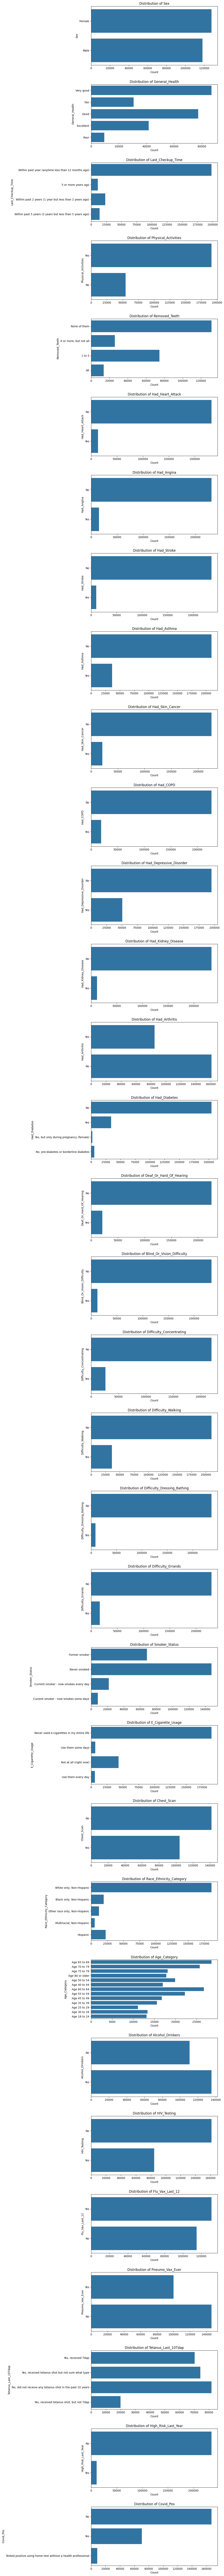

In [23]:
# Filter categorical variables
categorical_columns = [column for column in data.select_dtypes(include='object').columns if column != 'State']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(8, 4 * len(categorical_columns)))
fig.tight_layout(pad=4.0, h_pad=5.0)

# Loop through each categorical variable and create a bar plot
for i, column in enumerate(categorical_columns):
    sns.countplot(y=column, data=data, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(column)


plt.show()

## Cross-Tabulation for Categorical and Target Variables

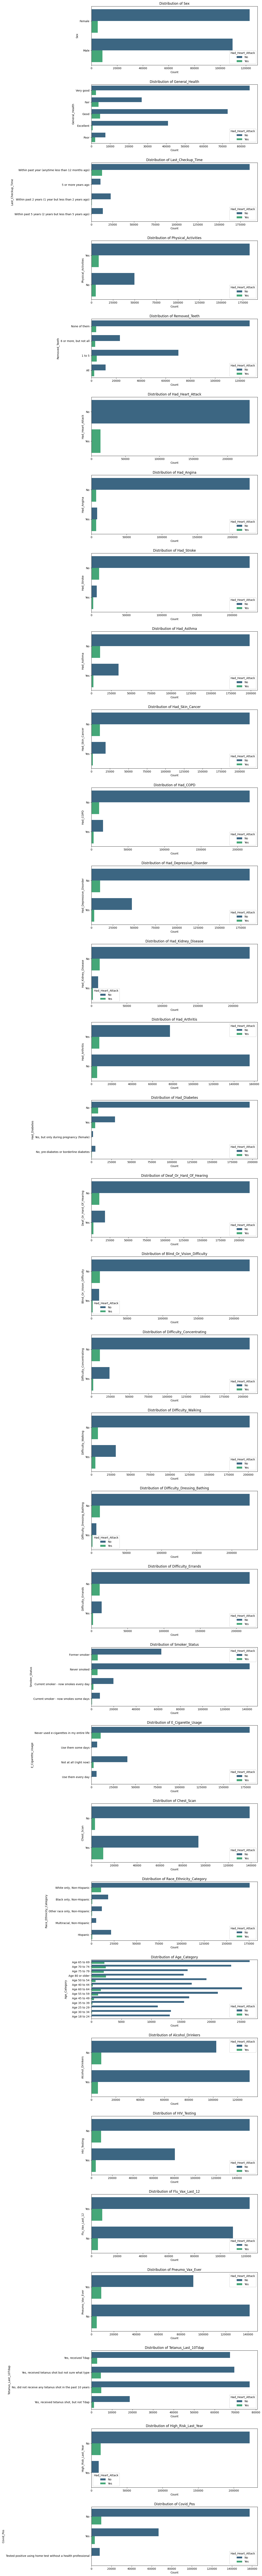

In [28]:
# Filter categorical variables
categorical_columns = [column for column in data.select_dtypes(include='object').columns if column != 'State']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, 4 * len(categorical_columns)))
fig.tight_layout(pad=4.0, h_pad=5.0)

# Loop through each categorical variable and create a bar plot
for i, column in enumerate(categorical_columns):
    sns.countplot(y=column, hue='Had_Heart_Attack', data=data, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(column)


plt.show()

## Class Frequency of Candidate Target Variables 
There are more than one variables in the dataset that we can use for classification. However, we must visualize the frequency of their categories.

<Axes: xlabel='Had_Heart_Attack', ylabel='count'>

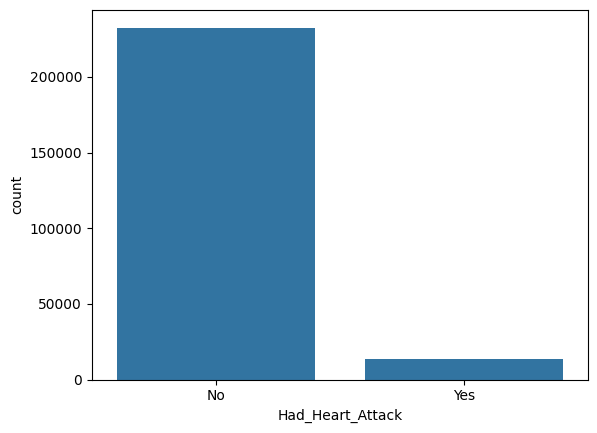

In [8]:
# Counts for the "Had_Heart_Attack" variable
sns.countplot(data=data,x='Had_Heart_Attack')

<Axes: xlabel='General_Health', ylabel='count'>

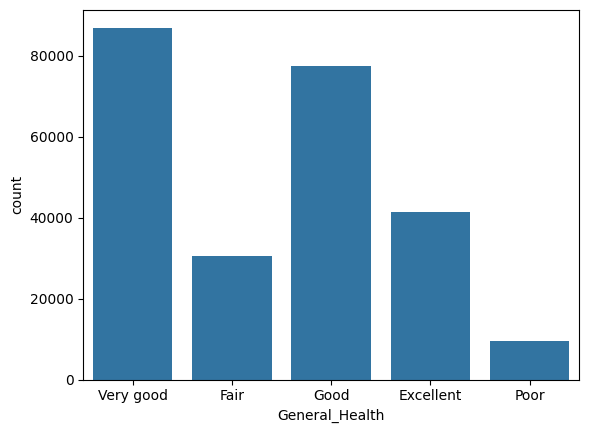

In [9]:
# Counts for the "General_Health" variable. This variable might be more important to predict
sns.countplot(data=data,x='General_Health')

# Generation of Synthetic Data
Some variables have imbalanced counts of their categories. Our goal is to generate synthetic data to solve this problem.

Select some important variables from the dataframe.

In [66]:
important_cols = ['Had_Heart_Attack', 
                  'Smoker_Status', 
                  'Alcohol_Drinkers',
                  'Had_Stroke',
                  'Difficulty_Walking',
                  'Sex',
                  'Age_Category',
                  'Race_Ethnicity_Category',
                  'Had_Diabetes',
                  'Physical_Activities',
                  'General_Health',
                  'Had_Asthma',
                  'Had_Kidney_Disease',
                  'Had_Skin_Cancer']

In [105]:
# Create a new dataframe and convert the values of the string categorical variables to numerical values
balanced_data = data[important_cols].copy()

# Apply label encoding to the specified (interesting_cols) columns. Use this if you want to convert the numerical categorical values/labels to the original string categories
label_encoders = {}
for column in important_cols:
    label_encoder = LabelEncoder()
    balanced_data[column] = label_encoder.fit_transform(balanced_data[column])
    label_encoders[column] = label_encoder


#balanced_data[important_cols] = balanced_data[important_cols].apply(LabelEncoder().fit_transform)

In [108]:
balanced_data.drop_duplicates(inplace=True)

In [110]:
balanced_data['Had_Heart_Attack'].value_counts()

Had_Heart_Attack
0    39174
1    13586
Name: count, dtype: int64

In [10]:
# Select only the columns that are important to the analysis, and convert their values to numerical categorical values 
imbalanced_data = data.copy()
imbalanced_data[important_cols] = imbalanced_data[important_cols].apply(LabelEncoder().fit_transform)
imbalanced_data = imbalanced_data[important_cols]

In [11]:
imbalanced_data.shape

(246022, 14)

## Generation with SMOTE and its variations

In [106]:
resampled_data = SMOTE().fit_resample(balanced_data[['Smoker_Status', 
                                                    'Alcohol_Drinkers',
                                                    'Had_Stroke',
                                                    'Difficulty_Walking',
                                                    'Sex',
                                                    'Age_Category',
                                                    'Race_Ethnicity_Category',
                                                    'Had_Diabetes',
                                                    'Physical_Activities',
                                                    'General_Health',
                                                    'Had_Asthma',
                                                    'Had_Kidney_Disease',
                                                    'Had_Skin_Cancer']], 
                                    balanced_data['Had_Heart_Attack'])
balanced_data = resampled_data[0]
balanced_data['Had_Heart_Attack'] = resampled_data[1].to_numpy()

<Axes: xlabel='Had_Heart_Attack', ylabel='count'>

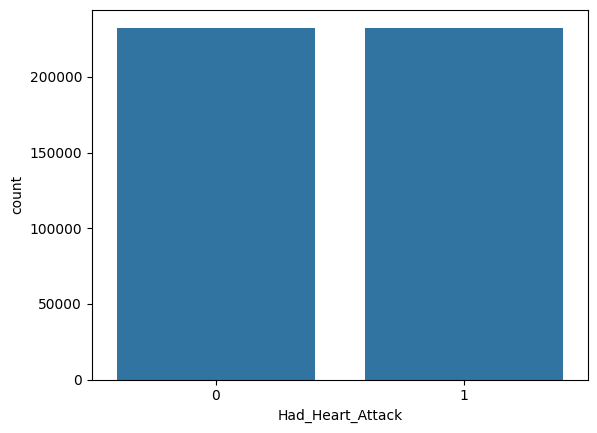

In [107]:
sns.countplot(data=balanced_data,x='Had_Heart_Attack')

In [84]:
# Reverse label encoding for the specified columns. Use this if you want to convert the numerical categorical values/labels to the original string categories
for column in important_cols:
    balanced_data[column] = label_encoders[column].inverse_transform(balanced_data[column])

In [75]:
balanced_data.shape

(78348, 14)

# Classification

## Classification with Data Mining Methods

### Data Preparation

In [ ]:
# Split the balanced dataset to a set of training and testing samples 
x_train, x_test, y_train, y_test = train_test_split(balanced_data[['Smoker_Status', 
                                                    'Alcohol_Drinkers',
                                                    'Had_Stroke',
                                                    'Difficulty_Walking',
                                                    'Sex',
                                                    'Age_Category',
                                                    'Race_Ethnicity_Category',
                                                    'Had_Diabetes',
                                                    'Physical_Activities',
                                                    'General_Health',
                                                    'Had_Asthma',
                                                    'Had_Kidney_Disease',
                                                    'Had_Skin_Cancer']], 
                                                    balanced_data['Had_Heart_Attack'], test_size=0.30, random_state=42, stratify=balanced_data['Had_Heart_Attack'])

In [25]:
# (Optional) Remove the duplicate samples from the imbalanced dataset
imbalanced_data.drop_duplicates(subset=['Had_Heart_Attack',
                                        'Smoker_Status', 
                                        'Alcohol_Drinkers',
                                        'Had_Stroke',
                                        'Difficulty_Walking',
                                        'Sex',
                                        'Age_Category',
                                        'Race_Ethnicity_Category',
                                        'Had_Diabetes',
                                        'Physical_Activities',
                                        'General_Health',
                                        'Had_Asthma',
                                        'Had_Kidney_Disease',
                                        'Had_Skin_Cancer'], inplace=True)

In [26]:
imbalanced_data.shape

(47639, 14)

In [12]:
# Split the imbalanced dataset to a set of training and testing samples 
x_train, x_test, y_train, y_test = train_test_split(imbalanced_data[['Smoker_Status', 
                                                    'Alcohol_Drinkers',
                                                    'Had_Stroke',
                                                    'Difficulty_Walking',
                                                    'Sex',
                                                    'Age_Category',
                                                    'Race_Ethnicity_Category',
                                                    'Had_Diabetes',
                                                    'Physical_Activities',
                                                    'General_Health',
                                                    'Had_Asthma',
                                                    'Had_Kidney_Disease',
                                                    'Had_Skin_Cancer']], 
                                                    imbalanced_data['Had_Heart_Attack'], test_size=0.20, random_state=42, stratify=imbalanced_data['Had_Heart_Attack'])

### XGBoost

In [77]:
# === Testing for balanced data ===
model_score = {}
for perc_value in list(np.arange(0.2, 0.35, 0.05)):
  x_train, x_test, y_train, y_test = train_test_split(balanced_data[['Smoker_Status', 
                                                    'Alcohol_Drinkers',
                                                    'Had_Stroke',
                                                    'Difficulty_Walking',
                                                    'Sex',
                                                    'Age_Category',
                                                    'Race_Ethnicity_Category',
                                                    'Had_Diabetes',
                                                    'Physical_Activities',
                                                    'General_Health',
                                                    'Had_Asthma',
                                                    'Had_Kidney_Disease',
                                                    'Had_Skin_Cancer']], 
                                                    balanced_data['Had_Heart_Attack'], test_size=perc_value, random_state=42, stratify=balanced_data['Had_Heart_Attack'])

  # Create an XGBClassifier object
  xgb = XGBClassifier(n_estimators= 500 , max_depth= 3 , learning_rate = 0.1)
  
  # Train the classifier
  xgb.fit(x_train , y_train)

  # Predict the response for test dataset
  y_pred = xgb.predict(x_test)

  # Find the F1 score
  f_score = f1_score(y_test, y_pred, average='macro')

  model_score[round(perc_value,2)] = [f_score, xgb]

  print(f'Test Size: {round(perc_value,2)}, F-Score: {f_score}')
  print('Confusion Matrix')

  print(classification_report(y_test, y_pred))

Test Size: 0.2, F-Score: 0.7194108539321002
Confusion Matrix
              precision    recall  f1-score   support

           0       0.74      0.67      0.71      7835
           1       0.70      0.77      0.73      7835

    accuracy                           0.72     15670
   macro avg       0.72      0.72      0.72     15670
weighted avg       0.72      0.72      0.72     15670

Test Size: 0.25, F-Score: 0.7182088627252134
Confusion Matrix
              precision    recall  f1-score   support

           0       0.74      0.67      0.70      9794
           1       0.70      0.77      0.73      9793

    accuracy                           0.72     19587
   macro avg       0.72      0.72      0.72     19587
weighted avg       0.72      0.72      0.72     19587

Test Size: 0.3, F-Score: 0.7215602118707254
Confusion Matrix
              precision    recall  f1-score   support

           0       0.75      0.67      0.71     11753
           1       0.70      0.77      0.73     11752

In [27]:
# === Testing for imbalanced data ===
model_score = {}
for perc_value in list(np.arange(0.2, 0.35, 0.05)):
  x_train, x_test, y_train, y_test = train_test_split(imbalanced_data[['Smoker_Status', 
                                                    'Alcohol_Drinkers',
                                                    'Had_Stroke',
                                                    'Difficulty_Walking',
                                                    'Sex',
                                                    'Age_Category',
                                                    'Race_Ethnicity_Category',
                                                    'Had_Diabetes',
                                                    'Physical_Activities',
                                                    'General_Health',
                                                    'Had_Asthma',
                                                    'Had_Kidney_Disease',
                                                    'Had_Skin_Cancer']], 
                                                    imbalanced_data['Had_Heart_Attack'], test_size=perc_value, random_state=42, stratify=imbalanced_data.Had_Heart_Attack)

  # Create an XGBClassifier object
  xgb = XGBClassifier(n_estimators= 500 , max_depth= 3 , learning_rate = 0.1)
  
  # Train the classifier
  xgb.fit(x_train , y_train)

  # Predict the response for test dataset
  y_pred = xgb.predict(x_test)

  # Find the F1 score
  f_score = f1_score(y_test, y_pred, average='weighted')

  model_score[round(perc_value,2)] = [f_score, xgb]

  print(f'Test Size: {round(perc_value,2)}, F-Score: {f_score}')
  print('Confusion Matrix')

  print(classification_report(y_test, y_pred))

Test Size: 0.2, F-Score: 0.7585538565026422
Confusion Matrix
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      7835
           1       0.51      0.05      0.10      1693

    accuracy                           0.82      9528
   macro avg       0.67      0.52      0.50      9528
weighted avg       0.77      0.82      0.76      9528

Test Size: 0.25, F-Score: 0.7582032710951525
Confusion Matrix
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      9794
           1       0.50      0.05      0.09      2116

    accuracy                           0.82     11910
   macro avg       0.66      0.52      0.50     11910
weighted avg       0.77      0.82      0.76     11910

Test Size: 0.3, F-Score: 0.7580064991132968
Confusion Matrix
              precision    recall  f1-score   support

           0       0.83      0.99      0.90     11752
           1       0.49      0.05      0.10      2540

### Decision Tree Classifier

In [ ]:
# Visualize the decision tree
def show_decision_tree_classifier(model, features):
  dot_data = StringIO()
  export_graphviz(model,
                  out_file=dot_data,
                  filled=False,
                  rounded=True,
                  special_characters=False,
                  impurity=True,
                  precision=2,
                  rotate=False,
                  feature_names=features,
                  fontname='arial',
                  label='all',
                  class_names=['1', '2', '3', '4', '5', '6'])

  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  graph.write_png('DecisionTree.png')

  return graph

In [78]:
# === Testing for balanced data ===
model_score = {}
for perc_value in list(np.arange(0.2, 0.35, 0.05)):
  x_train, x_test, y_train, y_test = train_test_split(balanced_data[['Smoker_Status', 
                                                    'Alcohol_Drinkers',
                                                    'Had_Stroke',
                                                    'Difficulty_Walking',
                                                    'Sex',
                                                    'Age_Category',
                                                    'Race_Ethnicity_Category',
                                                    'Had_Diabetes',
                                                    'Physical_Activities',
                                                    'General_Health',
                                                    'Had_Asthma',
                                                    'Had_Kidney_Disease',
                                                    'Had_Skin_Cancer']], 
                                                    balanced_data['Had_Heart_Attack'], test_size=perc_value, random_state=42, stratify=balanced_data.Had_Heart_Attack)

  # Create a Decision Tree Classifier object
  dt = DecisionTreeClassifier()

  # Train the classifier
  dt.fit(x_train , y_train)

  # Predict the response for test dataset
  y_pred = dt.predict(x_test)

  # Find the F1 score
  f_score = f1_score(y_test, y_pred, average='macro')

  model_score[round(perc_value,2)] = [f_score, dt]

  print(f'Test Size: {round(perc_value,2)}, F-Score: {f_score}')
  print('Confusion Matrix')

  print(classification_report(y_test, y_pred))

Test Size: 0.2, F-Score: 0.749618564555635
Confusion Matrix
              precision    recall  f1-score   support

           0       0.80      0.67      0.73      7835
           1       0.71      0.84      0.77      7835

    accuracy                           0.75     15670
   macro avg       0.76      0.75      0.75     15670
weighted avg       0.76      0.75      0.75     15670

Test Size: 0.25, F-Score: 0.7466672968812089
Confusion Matrix
              precision    recall  f1-score   support

           0       0.80      0.66      0.73      9794
           1       0.71      0.83      0.77      9793

    accuracy                           0.75     19587
   macro avg       0.76      0.75      0.75     19587
weighted avg       0.76      0.75      0.75     19587

Test Size: 0.3, F-Score: 0.7452071390433082
Confusion Matrix
              precision    recall  f1-score   support

           0       0.79      0.67      0.72     11753
           1       0.71      0.83      0.77     11752


In [28]:
# === Testing for imbalanced data ===
model_score = {}
for perc_value in list(np.arange(0.2, 0.35, 0.05)):
  x_train, x_test, y_train, y_test = train_test_split(imbalanced_data[['Smoker_Status', 
                                                    'Alcohol_Drinkers',
                                                    'Had_Stroke',
                                                    'Difficulty_Walking',
                                                    'Sex',
                                                    'Age_Category',
                                                    'Race_Ethnicity_Category',
                                                    'Had_Diabetes',
                                                    'Physical_Activities',
                                                    'General_Health',
                                                    'Had_Asthma',
                                                    'Had_Kidney_Disease',
                                                    'Had_Skin_Cancer']], 
                                                    imbalanced_data['Had_Heart_Attack'], test_size=perc_value, random_state=42, stratify=imbalanced_data.Had_Heart_Attack)

  # Create a Decision Tree Classifier object
  dt = DecisionTreeClassifier()

  # Train the classifier
  dt.fit(x_train , y_train)

  # Predict the response for test dataset
  y_pred = dt.predict(x_test)

  # Find the F1 score
  f_score = f1_score(y_test, y_pred, average='weighted')

  model_score[round(perc_value,2)] = [f_score, dt]

  print(f'Test Size: {round(perc_value,2)}, F-Score: {f_score}')
  print('Confusion Matrix')

  print(classification_report(y_test, y_pred))

Test Size: 0.2, F-Score: 0.6768303695182047
Confusion Matrix
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      7835
           1       0.10      0.10      0.10      1693

    accuracy                           0.68      9528
   macro avg       0.45      0.45      0.45      9528
weighted avg       0.68      0.68      0.68      9528

Test Size: 0.25, F-Score: 0.6830656539370453
Confusion Matrix
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      9794
           1       0.11      0.12      0.11      2116

    accuracy                           0.68     11910
   macro avg       0.46      0.46      0.46     11910
weighted avg       0.68      0.68      0.68     11910

Test Size: 0.3, F-Score: 0.6858626020085908
Confusion Matrix
              precision    recall  f1-score   support

           0       0.81      0.81      0.81     11752
           1       0.11      0.11      0.11      2540

### KNN

In [111]:
# Split the balanced dataset to a set of training and testing samples to set hyperparameters for the knn classifier
knn_hyper_train, knn_hyper_test = train_test_split(balanced_data, test_size=0.30, random_state=42, stratify=balanced_data['Had_Heart_Attack'])

In [ ]:
# Define the parameter grid for k
param_grid = {'n_neighbors': range(1, 7)}  # You can adjust the range based on your preferences

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')  # You can choose a different scoring metric

# Fit the grid search to the data
grid_search.fit(knn_hyper_train[['Smoker_Status', 
                                'Alcohol_Drinkers',
                                'Had_Stroke',
                                'Difficulty_Walking',
                                'Sex',
                                'Age_Category',
                                'Race_Ethnicity_Category',
                                'Had_Diabetes',
                                'Physical_Activities',
                                'General_Health',
                                'Had_Asthma',
                                'Had_Kidney_Disease',
                                'Had_Skin_Cancer']], knn_hyper_train['Had_Heart_Attack'])

# Get the best parameter (k) from the grid search
best_k = grid_search.best_params_['n_neighbors']

# Print the best k value
print(f'Optimal number of neighbors (k): {best_k}')

# Use the best model for predictions
best_knn_model = grid_search.best_estimator_
y_pred = best_knn_model.predict(knn_hyper_test[['Smoker_Status', 
                                                'Alcohol_Drinkers',
                                                'Had_Stroke',
                                                'Difficulty_Walking',
                                                'Sex',
                                                'Age_Category',
                                                'Race_Ethnicity_Category',
                                                'Had_Diabetes',
                                                'Physical_Activities',
                                                'General_Health',
                                                'Had_Asthma',
                                                'Had_Kidney_Disease',
                                                'Had_Skin_Cancer']])

# Evaluate the model performance
accuracy = best_knn_model.score(knn_hyper_test['Had_Heart_Attack'], y_pred)
print(f'Accuracy with optimal k: {accuracy}')

In [80]:
# === Testing for balanced data ===
model_score = {}
for perc_value in list(np.arange(0.2, 0.35, 0.05)):
    x_train, x_test, y_train, y_test = train_test_split(balanced_data[['Smoker_Status', 
                                                                    'Alcohol_Drinkers',
                                                                    'Had_Stroke',
                                                                    'Difficulty_Walking',
                                                                    'Sex',
                                                                    'Age_Category',
                                                                    'Race_Ethnicity_Category',
                                                                    'Had_Diabetes',
                                                                    'Physical_Activities',
                                                                    'General_Health',
                                                                    'Had_Asthma',
                                                                    'Had_Kidney_Disease',
                                                                    'Had_Skin_Cancer']], 
                                                                    balanced_data['Had_Heart_Attack'], test_size=perc_value, random_state=42, stratify=balanced_data.Had_Heart_Attack)

    # Define the KNeighborsClassifier object
    knn_classifier = KNeighborsClassifier(n_neighbors=3)  # You can adjust n_neighbors as needed
    
    # Train the classifier
    knn_classifier.fit(x_train, y_train)

    # Predict
    y_pred = knn_classifier.predict(x_test)

    f_score = f1_score(y_test, y_pred, average='macro')
    model_score[round(perc_value, 2)] = [f_score, knn_classifier]

    print(f'Test Size: {round(perc_value, 2)}, F-Score: {f_score}')
    print('Confusion Matrix')
    print(classification_report(y_test, y_pred))

Test Size: 0.2, F-Score: 0.72912193214022
Confusion Matrix
              precision    recall  f1-score   support

           0       0.86      0.57      0.68      7835
           1       0.68      0.90      0.77      7835

    accuracy                           0.74     15670
   macro avg       0.77      0.74      0.73     15670
weighted avg       0.77      0.74      0.73     15670

Test Size: 0.25, F-Score: 0.7251356601795692
Confusion Matrix
              precision    recall  f1-score   support

           0       0.85      0.57      0.68      9794
           1       0.67      0.90      0.77      9793

    accuracy                           0.73     19587
   macro avg       0.76      0.73      0.73     19587
weighted avg       0.76      0.73      0.73     19587

Test Size: 0.3, F-Score: 0.7273341441471213
Confusion Matrix
              precision    recall  f1-score   support

           0       0.85      0.57      0.68     11753
           1       0.68      0.90      0.77     11752



In [64]:
# === Testing for imbalanced data ===
model_score = {}
for perc_value in list(np.arange(0.2, 0.35, 0.05)):
    x_train, x_test, y_train, y_test = train_test_split(imbalanced_data[['Smoker_Status', 
                                                                    'Alcohol_Drinkers',
                                                                    'Had_Stroke',
                                                                    'Difficulty_Walking',
                                                                    'Sex',
                                                                    'Age_Category',
                                                                    'Race_Ethnicity_Category',
                                                                    'Had_Diabetes',
                                                                    'Physical_Activities',
                                                                    'General_Health',
                                                                    'Had_Asthma',
                                                                    'Had_Kidney_Disease',
                                                                    'Had_Skin_Cancer']], 
                                                                    imbalanced_data['Had_Heart_Attack'], test_size=perc_value, random_state=42, stratify=imbalanced_data.Had_Heart_Attack)

    # Define the KNeighborsClassifier object
    knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed
    
    # Train the classifier
    knn_classifier.fit(x_train, y_train)

    # Predict
    y_pred = knn_classifier.predict(x_test)

    f_score = f1_score(y_test, y_pred, average='macro')
    model_score[round(perc_value, 2)] = [f_score, knn_classifier]

    print(f'Test Size: {round(perc_value, 2)}, F-Score: {f_score}')
    print('Confusion Matrix')
    print(classification_report(y_test, y_pred))

Test Size: 0.2, F-Score: 0.5065088996251457
Confusion Matrix
              precision    recall  f1-score   support

           0       0.83      0.93      0.87      7835
           1       0.23      0.10      0.14      1693

    accuracy                           0.78      9528
   macro avg       0.53      0.51      0.51      9528
weighted avg       0.72      0.78      0.74      9528

Test Size: 0.25, F-Score: 0.5004087376963372
Confusion Matrix
              precision    recall  f1-score   support

           0       0.83      0.93      0.87      9794
           1       0.21      0.09      0.13      2116

    accuracy                           0.78     11910
   macro avg       0.52      0.51      0.50     11910
weighted avg       0.72      0.78      0.74     11910

Test Size: 0.3, F-Score: 0.5081661980493409
Confusion Matrix
              precision    recall  f1-score   support

           0       0.83      0.93      0.88     11752
           1       0.24      0.10      0.14      2540

### Random Forests

In [20]:
# Split the balanced dataset to a set of training and testing samples to set hyperparameters for the random forests classifier
rf_hyper_train, rf_hyper_test = train_test_split(balanced_data, test_size=0.30, random_state=42, stratify=balanced_data['Had_Heart_Attack'])

In [ ]:
param_dist = {'n_estimators': randint(50,150),
              'max_depth': randint(1,20)}


# Create the Random Forests classifer object
rf = RandomForestClassifier()


# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Train the Random Forests Classifer
rand_search = rand_search.fit(rf_hyper_train[['Smoker_Status', 
                                            'Alcohol_Drinkers',
                                            'Had_Stroke',
                                            'Difficulty_Walking',
                                            'Sex',
                                            'Age_Category',
                                            'Race_Ethnicity_Category',
                                            'Had_Diabetes',
                                            'Physical_Activities',
                                            'General_Health',
                                            'Had_Asthma',
                                            'Had_Kidney_Disease',
                                            'Had_Skin_Cancer']], rf_hyper_train['Had_Heart_Attack'])


# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

In [ ]:
# === Testing for balanced data ===
model_score = {}
for perc_value in list(np.arange(0.2, 0.35, 0.05)):
  x_train, x_test, y_train, y_test = train_test_split(balanced_data[['Smoker_Status', 
                                                    'Alcohol_Drinkers',
                                                    'Had_Stroke',
                                                    'Difficulty_Walking',
                                                    'Sex',
                                                    'Age_Category',
                                                    'Race_Ethnicity_Category',
                                                    'Had_Diabetes',
                                                    'Physical_Activities',
                                                    'General_Health',
                                                    'Had_Asthma',
                                                    'Had_Kidney_Disease',
                                                    'Had_Skin_Cancer']], 
                                                    balanced_data['Had_Heart_Attack'], test_size=perc_value, random_state=42, stratify=balanced_data.Had_Heart_Attack)

  # Create the Random Forests classifer object
  rf_classifier = RandomForestClassifier(n_estimators=393, max_depth=16)

  # Train the Random Forests Classifer
  rf_classifier.fit(x_train, y_train)

  # Predict the response for test dataset
  y_pred = rf_classifier.predict(x_test)

  # Find the F1 score
  f_score = f1_score(y_test, y_pred, average='macro')

  model_score[round(perc_value,2)] = [f_score, rf_classifier]

  print(f'Test Size: {round(perc_value,2)}, F-Score: {f_score}')
  print('Confusion Matrix')

  print(classification_report(y_test, y_pred))

In [ ]:
# === Testing for imbalanced data ===
model_score = {}
for perc_value in list(np.arange(0.2, 0.35, 0.05)):
  x_train, x_test, y_train, y_test = train_test_split(imbalanced_data[['Smoker_Status', 
                                                    'Alcohol_Drinkers',
                                                    'Had_Stroke',
                                                    'Difficulty_Walking',
                                                    'Sex',
                                                    'Age_Category',
                                                    'Race_Ethnicity_Category',
                                                    'Had_Diabetes',
                                                    'Physical_Activities',
                                                    'General_Health',
                                                    'Had_Asthma',
                                                    'Had_Kidney_Disease',
                                                    'Had_Skin_Cancer']], 
                                                    imbalanced_data['Had_Heart_Attack'], test_size=perc_value, random_state=42, stratify=imbalanced_data.Had_Heart_Attack)

  # Create the Random Forests classifer object
  rf_classifier = RandomForestClassifier(n_estimators=393, max_depth=16)

  # Train the Random Forests Classifer
  rf_classifier.fit(x_train, y_train)

  # Predict the response for test dataset
  y_pred = rf_classifier.predict(x_test)

  # Find the F1 score
  f_score = f1_score(y_test, y_pred, average='weighted')

  model_score[round(perc_value,2)] = [f_score, rf_classifier]

  print(f'Test Size: {round(perc_value,2)}, F-Score: {f_score}')
  print('Confusion Matrix')

  print(classification_report(y_test, y_pred))

### Gaussian Naive Bayes

In [81]:
# === Testing for balanced data ===
model_score = {}
for perc_value in list(np.arange(0.2, 0.35, 0.05)):
  x_train, x_test, y_train, y_test = train_test_split(balanced_data[['Smoker_Status', 
                                                    'Alcohol_Drinkers',
                                                    'Had_Stroke',
                                                    'Difficulty_Walking',
                                                    'Sex',
                                                    'Age_Category',
                                                    'Race_Ethnicity_Category',
                                                    'Had_Diabetes',
                                                    'Physical_Activities',
                                                    'General_Health',
                                                    'Had_Asthma',
                                                    'Had_Kidney_Disease',
                                                    'Had_Skin_Cancer']], 
                                                    balanced_data['Had_Heart_Attack'], test_size=perc_value, random_state=42, stratify=balanced_data.Had_Heart_Attack)

  # Create a Gaussian Naive Bayes Classifier object
  gnb = GaussianNB()

  # Train the classifier
  gnb.fit(x_train , y_train)

  # Predict the response for test dataset
  y_pred = dt.predict(x_test)

  # Find the F1 score
  f_score = f1_score(y_test, y_pred, average='macro')

  model_score[round(perc_value,2)] = [f_score, gnb]

  print(f'Test Size: {round(perc_value,2)}, F-Score: {f_score}')
  print('Confusion Matrix')

  print(classification_report(y_test, y_pred))

Test Size: 0.2, F-Score: 0.7430230183457143
Confusion Matrix
              precision    recall  f1-score   support

           0       0.79      0.66      0.72      7835
           1       0.71      0.82      0.76      7835

    accuracy                           0.74     15670
   macro avg       0.75      0.74      0.74     15670
weighted avg       0.75      0.74      0.74     15670

Test Size: 0.25, F-Score: 0.7448313288828388
Confusion Matrix
              precision    recall  f1-score   support

           0       0.79      0.67      0.72      9794
           1       0.71      0.83      0.77      9793

    accuracy                           0.75     19587
   macro avg       0.75      0.75      0.74     19587
weighted avg       0.75      0.75      0.74     19587

Test Size: 0.3, F-Score: 0.7452071390433082
Confusion Matrix
              precision    recall  f1-score   support

           0       0.79      0.67      0.72     11753
           1       0.71      0.83      0.77     11752

In [29]:
# === Testing for imbalanced data ===
model_score = {}
for perc_value in list(np.arange(0.2, 0.35, 0.05)):
  x_train, x_test, y_train, y_test = train_test_split(imbalanced_data[['Smoker_Status', 
                                                    'Alcohol_Drinkers',
                                                    'Had_Stroke',
                                                    'Difficulty_Walking',
                                                    'Sex',
                                                    'Age_Category',
                                                    'Race_Ethnicity_Category',
                                                    'Had_Diabetes',
                                                    'Physical_Activities',
                                                    'General_Health',
                                                    'Had_Asthma',
                                                    'Had_Kidney_Disease',
                                                    'Had_Skin_Cancer']], 
                                                    imbalanced_data['Had_Heart_Attack'], test_size=perc_value, random_state=42, stratify=imbalanced_data.Had_Heart_Attack)

  # Create a Gaussian Naive Bayes Classifier object
  gnb = GaussianNB()

  # Train the classifier
  gnb.fit(x_train , y_train)

  # Predict the response for test dataset
  y_pred = dt.predict(x_test)

  # Find the F1 score
  f_score = f1_score(y_test, y_pred, average='weighted')

  model_score[round(perc_value,2)] = [f_score, gnb]

  print(f'Test Size: {round(perc_value,2)}, F-Score: {f_score}')
  print('Confusion Matrix')

  print(classification_report(y_test, y_pred))

Test Size: 0.2, F-Score: 0.6854854981291099
Confusion Matrix
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      7835
           1       0.11      0.11      0.11      1693

    accuracy                           0.69      9528
   macro avg       0.46      0.46      0.46      9528
weighted avg       0.69      0.69      0.69      9528

Test Size: 0.25, F-Score: 0.6867461863327988
Confusion Matrix
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      9794
           1       0.12      0.12      0.12      2116

    accuracy                           0.69     11910
   macro avg       0.46      0.46      0.46     11910
weighted avg       0.69      0.69      0.69     11910

Test Size: 0.3, F-Score: 0.6858626020085908
Confusion Matrix
              precision    recall  f1-score   support

           0       0.81      0.81      0.81     11752
           1       0.11      0.11      0.11      2540

## Classification with NLP Methods

### Convert original data to text sequences/sentences

In [82]:
age_categories = {
    'Age 65 to 69': 'Senior',
    'Age 70 to 74': 'Senior',
    'Age 75 to 79': 'Senior',
    'Age 80 or older': 'Elderly',
    'Age 50 to 54': 'Middle-Aged',
    'Age 40 to 44': 'Adult',
    'Age 60 to 64': 'Middle-Aged',
    'Age 55 to 59': 'Middle-Aged',
    'Age 45 to 49': 'Adult',
    'Age 35 to 39': 'Adult',
    'Age 25 to 29': 'Young Adult',
    'Age 30 to 34': 'Adult',
    'Age 18 to 24': 'Young Adult',
}

In [33]:
modified_data = data[important_cols].copy()

In [87]:
modified_data = balanced_data.copy()

In [88]:
modified_data.isna().sum()

Smoker_Status              0
Alcohol_Drinkers           0
Had_Stroke                 0
Difficulty_Walking         0
Sex                        0
Age_Category               0
Race_Ethnicity_Category    0
Had_Diabetes               0
Physical_Activities        0
General_Health             0
Had_Asthma                 0
Had_Kidney_Disease         0
Had_Skin_Cancer            0
Had_Heart_Attack           0
dtype: int64

In [38]:
# (Optional) Remove the duplicate samples from the modified dataset
modified_data.drop_duplicates(subset=[  'Had_Heart_Attack',
                                        'Smoker_Status', 
                                        'Alcohol_Drinkers',
                                        'Had_Stroke',
                                        'Difficulty_Walking',
                                        'Sex',
                                        'Age_Category',
                                        'Race_Ethnicity_Category',
                                        'Had_Diabetes',
                                        'Physical_Activities',
                                        'General_Health',
                                        'Had_Asthma',
                                        'Had_Kidney_Disease',
                                        'Had_Skin_Cancer'], inplace=True)

In [89]:
modified_data.shape

(78348, 14)

In [90]:
# Replace the original age categories with new ones
modified_data['Age_Category'] = modified_data['Age_Category'].replace(age_categories)

***Use the dictionary values below if the variable "Had_Heart_Attack" is not the target variable***

'Had_Heart_Attack': {
    'No': "i have never had a heart attack",
    'Yes': "i had a heart attack"
},

The "sequences" dictionary is used to generate text sequences from the original data. We loop through each sample and check if the current column name exists in the dictionary. If it does, we concatenate the sequence corresponding to the value of that column to the rest of the sequences thus generating a sentence. For example, when we get to the column "Smoker_Status", depending on its value for the current sample, we select the appropriate sequence corresponding to that value.

In [91]:
sequences = {
    
    'Smoker_Status': {
        'Former smoker': "i'm a former smoker",
        'Never smoked': "i've never smoked",
        'Current smoker - now smokes every day': "i smoke every day",
        'Current smoker - now smokes some days': "i smoke some days"
    },
    'Alcohol_Drinkers': {
        'No': "i don't consume alcohol",
        'Yes': "i consume alcohol"
    },
    'Had_Stroke': {
        'No': "i've never had a stroke",
        'Yes': "i had a stroke"
    },
    'Difficulty_Walking': {
        'No': "i walk just fine",
        'Yes': "i'm having a difficulty walking"
    },
    'Sex': {
        'Male': "i'm a male",
        'Female': "i'm a female"
    },
    'Age_Category': {
        'Young Adult': "i'm a young adult",
        'Adult': "i'm an adult",
        'Middle-Aged': "i'm middle aged",
        'Senior': "i'm a senior",
        'Elderly': "i'm elderly"
    },
    'Race_Ethnicity_Category': {
        'White only, Non-Hispanic': "i'm white",
        'Black only, Non-Hispanic': "i'm black",
        'Other race only, Non-Hispanic': "i belong to some other race",
        'Multiracial, Non-Hispanic': "i'm from multiple races",
        'Hispanic': "i'm hispanic"
    },
    'Had_Diabetes': {
        'No': "i've never had skin cancer",
        'Yes': "i had skin cancer"
    },
    'Physical_Activities': {
        'No': "i don't exercise",
        'Yes': "i exercise"
    },
    'General_Health': {
        'Very good': "my health is very good",
        'Fair': "my health is decent",
        'Good': "my health is good",
        'Excellent': "my health is very excellent",
        'Poor': "my health is poor"
    },
    'Had_Asthma': {
        'No': "i've never had asthma",
        'Yes': "i had asthma"
    },
    'Had_Kidney_Disease': {
        'No': "i've never had a kidney disease",
        'Yes': "i had kidney disease"
    },
    'Had_Skin_Cancer': {
        'No': "i've never had skin cancer",
        'Yes': "i had skin cancer"
    }
    
}

The following algorithm implements the generation of text sequences from the original data.

In [92]:
# Create an empty list to store rows for the new dataset
new_dataset_rows = []

# Iterate through each row in the original dataset
for _, row in modified_data.iterrows():
    sentence_parts = []  # To store parts of the sentence for each row
    
    # Iterate through each column in the original dataset
    for column_name, value in row.items():
        # Check if the current column is in the descriptions dictionary
        if column_name in sequences:
            # Get the description for the current value of the variable
            description = sequences[column_name].get(value, '')
            # Add a comma to the end of the description
            description += ','
            # Add the description to the sentence parts
            sentence_parts.append(description)
        
        # Check if the current column is the target variable
        elif column_name == 'Had_Heart_Attack':
            # Add the target variable's value to the second column of the new dataset
            classification_value = value
    
    # Concatenate the sentence parts into a single sentence
    sentence = ' '.join(sentence_parts)
    
    # Create a new row for the new dataset
    new_dataset_rows.append({'Sentence': sentence, 'Classification': classification_value})

# Create the new dataset from the list of rows
new_dataset = pd.DataFrame(new_dataset_rows)

# Display the new dataset
print(new_dataset)


                                                Sentence Classification
0      i'm a former smoker, i don't consume alcohol, ...             No
1      i'm a former smoker, i don't consume alcohol, ...             No
2      i'm a former smoker, i consume alcohol, i've n...             No
3      i've never smoked, i don't consume alcohol, i'...             No
4      i've never smoked, i don't consume alcohol, i'...             No
...                                                  ...            ...
78343  i'm a former smoker, i consume alcohol, i've n...            Yes
78344  i'm a former smoker, i don't consume alcohol, ...            Yes
78345  i smoke every day, i consume alcohol, i've nev...            Yes
78346  i'm a former smoker, i consume alcohol, i've n...            Yes
78347  i'm a former smoker, i consume alcohol, i had ...            Yes

[78348 rows x 2 columns]


In [93]:
# Capitalize the "i" in the beginning of each sentence, remove the comma from the end fo the sentence and replace it with a period.
new_dataset['Sentence'] = new_dataset['Sentence'].str.rstrip(',')  # Remove comma from the end
new_dataset['Sentence'] = new_dataset['Sentence'].str.capitalize()  # Capitalize "I" at the beginning
new_dataset['Sentence'] = new_dataset['Sentence'].str.replace(r'\bi\b', 'I')  # Capitalize standalone "i"
new_dataset['Sentence'] = new_dataset['Sentence'] + '.'  # Replace comma with a period at the end

In [94]:
print(new_dataset)

                                                Sentence Classification
0      I'm a former smoker, i don't consume alcohol, ...             No
1      I'm a former smoker, i don't consume alcohol, ...             No
2      I'm a former smoker, i consume alcohol, i've n...             No
3      I've never smoked, i don't consume alcohol, i'...             No
4      I've never smoked, i don't consume alcohol, i'...             No
...                                                  ...            ...
78343  I'm a former smoker, i consume alcohol, i've n...            Yes
78344  I'm a former smoker, i don't consume alcohol, ...            Yes
78345  I smoke every day, i consume alcohol, i've nev...            Yes
78346  I'm a former smoker, i consume alcohol, i've n...            Yes
78347  I'm a former smoker, i consume alcohol, i had ...            Yes

[78348 rows x 2 columns]


In [95]:
# Convert "Yes" to 1 and "No" to 0 in the 'Classification' column
new_dataset['Classification'] = new_dataset['Classification'].map({'Yes': 1, 'No': 0})

In [96]:
new_dataset['Classification'].value_counts()

Classification
0    39174
1    39174
Name: count, dtype: int64

In [85]:
# Save the new sentence dataset. This dataset will be used for sequence classification tasks.
new_dataset.to_excel("Sentence Dataframes/Sentence_Dataset_xlsx.xlsx",  index=False)

### Classification using Multinomial NB Classifers

In [97]:
def add_not_to_words(sentence):
    words = sentence.split()
    new_sentence = []

    add_not = False

    for word in words:
        if add_not:
            new_sentence.append("NOT_" + word)
            # Stop adding "NOT_" when a comma is encountered
            if "," in word:
                add_not = False
        else:
            new_sentence.append(word)

        # Check for "don't" and "never" to start adding "NOT_"
        if word.lower() == "don't" or word.lower() == "never":
            add_not = True

    return ' '.join(new_sentence)


In [98]:
negation_sentence_data = new_dataset.copy()

In [99]:
# Apply the function to every sentence in the DataFrame
negation_sentence_data['Sentence'] = negation_sentence_data['Sentence'].apply(add_not_to_words)

#### Multinomial NB

In [101]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(negation_sentence_data['Sentence'], negation_sentence_data['Classification'], test_size=0.3, random_state=42, stratify=negation_sentence_data['Classification'])

# Create a CountVectorizer to convert the text data into numerical features
vectorizer = CountVectorizer()
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

# Train a Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(x_train_vectorized, y_train)

# Make predictions on the test set
y_pred = clf.predict(x_test_vectorized)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_rep)

Accuracy: 0.65
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.60      0.63     11753
           1       0.64      0.70      0.67     11752

    accuracy                           0.65     23505
   macro avg       0.65      0.65      0.65     23505
weighted avg       0.65      0.65      0.65     23505



#### Multi-variate Bernoulli NB

In [103]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(new_dataset['Sentence'], new_dataset['Classification'], test_size=0.3, random_state=42, stratify=new_dataset['Classification'])

# Create a CountVectorizer to convert the text data into numerical features
vectorizer = CountVectorizer()
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

# Train a Bernoulli Naive Bayes classifier
clf = BernoulliNB()
clf.fit(x_train_vectorized, y_train)

# Make predictions on the test set
y_pred = clf.predict(x_test_vectorized)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_rep)

Accuracy: 0.64
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.59      0.62     11753
           1       0.62      0.69      0.65     11752

    accuracy                           0.64     23505
   macro avg       0.64      0.64      0.64     23505
weighted avg       0.64      0.64      0.64     23505



#### Binary Multinomial NB

In [55]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(new_dataset['Sentence'], new_dataset['Classification'], test_size=0.3, random_state=42, stratify=new_dataset['Classification'])

# Create a CountVectorizer to convert the text data into numerical features
vectorizer = CountVectorizer()
x_train_vectorized = vectorizer.fit_transform(x_train.apply(lambda x: ' '.join(set(x.split()))))
x_test_vectorized = vectorizer.transform(x_test.apply(lambda x: ' '.join(set(x.split()))))

# Train a Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(x_train_vectorized, y_train)

# Make predictions on the test set
y_pred = clf.predict(x_test_vectorized)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_rep)

Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86     11752
           1       0.34      0.30      0.32      2540

    accuracy                           0.77     14292
   macro avg       0.60      0.59      0.59     14292
weighted avg       0.76      0.77      0.77     14292

